# HOMEWORK 01

## MODULES IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import imageio.v2 as imageio
from IPython.display import HTML

## FUNCTIONS DEFINITION

In [2]:
def l2norm(u):
    return np.sum(u**2) / len(u)

# Integrator for FTCS, LF, LW
def integrate(u_in, t_f, method, par=[10, 101, 1, .5]):
    L, N, a, cf = par
    
    x, dx = np.linspace(0, L, N), L / (N - 1)
    dt = cf * dx / a
    time = np.arange(int(t_f / dt) + 1) * dt

    u_f = []
    norm = []

    u_cur = u_in.copy()

    u_f.append(u_cur)
    norm.append(l2norm(u_cur))
    for t in time:
        u_next = method(u_cur, dt, dx, a)
        u_cur = u_next.copy()
        
        u_f.append(u_cur)
        norm.append(l2norm(u_cur))

    return time, np.array(u_f), np.array(norm)

In [3]:
# METHODS
# NOTE: all methods are implemented using periodic boundary conditions (using np.roll)

# Forward in Time Centered in Space
def FTCS(u_cur, dt, dx, a):
    u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
    return u_cur - a * dt / (2 * dx) * (u_jp - u_jm)

# Lax - Friedrichs
def LF(u_cur, dt, dx, a):
    u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
    return .5 * (u_jp - u_jm) - a * dt / (2 * dx) * (u_jp - u_jm)

# Lax - Wendroff
def LW(u_cur, dt, dx, a):
    u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
    return u_cur - a * dt / (2 * dx) * (u_jp - u_jm) + (a * dt / dx)**2 / 2 * (u_jp - 2 * u_cur + u_jm)

In [4]:
# LEAPFROG METHOD

def leapfrog(u_in, t_f, par=[10, 101, 1, .5]):
    L, N, a, cf = par
    
    x, dx = np.linspace(0, L, N), L / (N - 1)
    dt = cf * dx / a
    time = np.arange(int(t_f / dt) + 1) * dt

    u_f = []
    norm = []

    u_prev = u_in.copy()
    u_cur = FTCS(u_prev, dt, dx, a)

    u_f.append(u_prev)
    norm.append(l2norm(u_prev))
    u_f.append(u_cur)
    norm.append(l2norm(u_cur))
    for t in time:
        u_jp, u_jm = np.roll(u_cur, -1), np.roll(u_cur, 1)
        u_next = u_prev - a * dt / dx * (u_jp - u_jm)

        u_prev = u_cur.copy()
        u_cur = u_next.copy()
        
        u_f.append(u_cur)
        norm.append(l2norm(u_cur))

    return np.array(u_f), np.array(norm)

# 1 - ADVECTION EQUATION
Solve the advection equation $\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0$, with $a = 1$ and intial condition:

$u(x, t = 0) = \exp[-(x - x_0)^2]$


In [5]:
# SET UP

# Define the speed a
a = 1.0

# Define the domain
L, N = 10.0, 101   # domain length, number of grid points
dx = L / (N - 1)   # grid spacing
x = np.linspace(0, L, N)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
t_f = 20.0

# Define the initial condition
x0 = 5
u_in = np.exp(-(x - x0)**2)

## FTCS

In [7]:
# Solve the equation with FTCS

time, u_f, l2norm = integrate(u_in, t_f, FTCS, [L, N, a, cf])

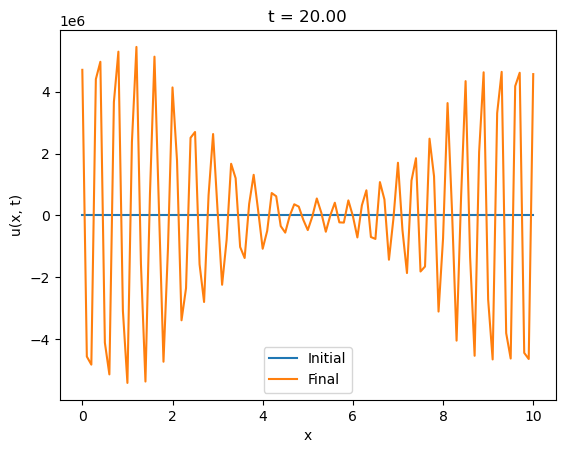

In [9]:
# Plot the final solution

plt.plot(x, u_in, label='Initial')
plt.plot(x, u_f[-1], label='Final')

plt.title(f't = {time[-1]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
#plt.ylim(0,1.1)

plt.legend()
plt.show()

# MOVIE CREATION

In [22]:
# Create directory where to save images
print(os.getcwd())

directory = './images-ftcs'

os.makedirs(directory)
os.listdir('./')

directory += '/'

/home/studente/Documents/MD-Astrophysics/NR/NR-24-25/H01


In [23]:
# Save the plot of the results every n iterations

n = 10

for i, (t, u) in enumerate(zip(time[::n], u_f[::n])):
    plt.plot(x, u)
    
    plt.title(f't = {t:.2f}')
    plt.xlabel('x')
    plt.ylabel('u(x, t)')
    #plt.ylim(0,1.1)
    
    plt.savefig(directory+str(i).zfill(5)+'.png', dpi=200)
    plt.close()

In [24]:
# get the list of image files in the directory
files = os.listdir(directory)

#print(files, '\n')

# sort the files in alphanumeric order
files = sorted(files)

print(files)

['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png']


In [25]:
#

movie = './movie-ftcs.mp4'
with imageio.get_writer(movie, mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread(directory+file)
        writer.append_data(image)
        
files=[]

In [26]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie-ftcs.mp4" type="video/mp4">
</video></div>""")